Note: you may need to restart the kernel to use updated packages.


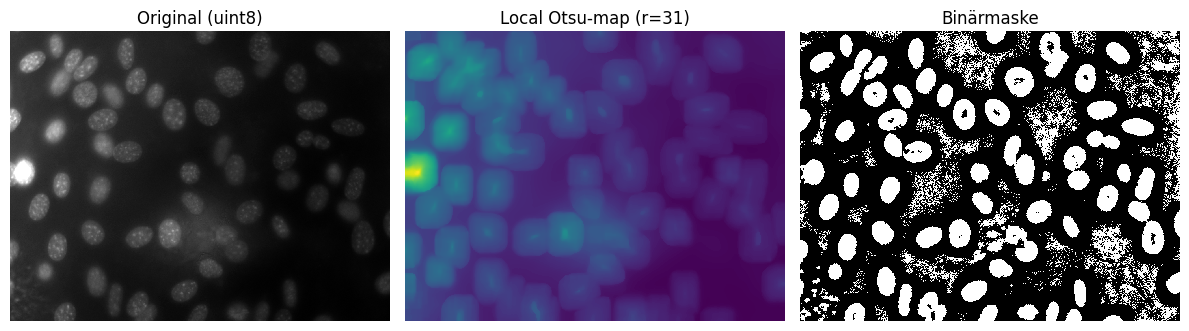

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_ubyte
from skimage.filters import threshold_otsu

from src.image_find import load_image_gray # loading image find function across all data
from src.otsu_global import otsu_threshold, binarize
from src.gray_hist    import compute_gray_histogram

%pip install imagecodecs

# 2) Bild laden (als Float [0,1]) und in uint8 (0–255) umwandeln:
image =  load_image_gray("dna-44.png")
image_u8   = img_as_ubyte(image)

# 2) Fenster‐Radius und -Größe
radius = 31            # Halbkante des Fensters
w = 2*radius + 1        # Fenstergröße z.B. 15

H, W = image_u8.shape
# 3) Karte für lokale Thresholds anlegen
t_map = np.zeros((H, W), dtype=np.uint8)

# 4) Padding, damit Fenster auch am Rand passt
padded = np.pad(image_u8, radius, mode="reflect")

# 5) Für jeden Pixel (außer Rand) lokal Otsu berechnen
for i in range(radius, radius + H):
    for j in range(radius, radius + W):
        # 5a) Lokales Fenster extrahieren
        block = padded[i-radius : i+radius+1,
                       j-radius : j+radius+1]
        # 5b) Otsu‐Threshold für dieses Fenster
        t_local = threshold_otsu(block)
        # 5c) In die Map an korrespondierender Position (ohne Padding) schreiben
        t_map[i-radius, j-radius] = t_local

# 6) Binärmaske erzeugen
binary_local = image_u8 > t_map

# 7) Anzeigen
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(image_u8, cmap="gray", interpolation="none")
axes[0].set_title("Original (uint8)"); axes[0].axis("off")

axes[1].imshow(t_map, cmap="viridis", interpolation="none")
axes[1].set_title(f"Local Otsu-map (r={radius})"); axes[1].axis("off")

axes[2].imshow(binary_local, cmap="gray", interpolation="none")
axes[2].set_title("Binärmaske"); axes[2].axis("off")

plt.tight_layout()
plt.show()